In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pycta.portfolio import Portfolio
from pycta.beakerx import *
from pycta.analysis import Analysis

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
# Load prices
prices = pd.read_csv("data/prices.csv", index_col=0, parse_dates=True).ffill().truncate(before="1970-01-01")

In [3]:
# take two moving averages and apply sign-functiond
def f(price, fast=32, slow=96):
    s = price.ewm(com=slow, min_periods=300).mean()
    f = price.ewm(com=fast, min_periods=300).mean()
    return np.sign(f-s)

In [4]:
form = EasyForm("Configuration")
form.addTextField("fast")
form.addTextField("slow")
form.addButton("Go!", tag="run")
form 

In [5]:
portfolio = Portfolio(prices=prices, position=prices.apply(f, fast=int(form["fast"] or 32), slow=int(form["slow"] or 96)))

In [7]:
a = Analysis(portfolio.nav())
a.performance

Performance number
Annua Return                        7.64
Annua Volatility                   16.03
Annua Sharpe Ratio (r_f = 0)        0.48
Max Drawdown                       60.55
Return                          3,590.06
Kurtosis                           34.56
dtype: object

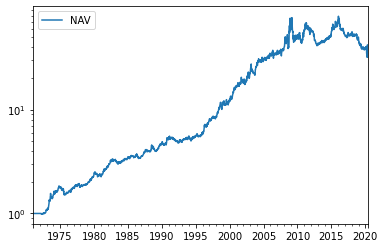

In [12]:
a.nav.plot(logy=True)
plt.show()

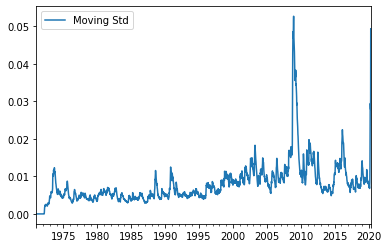

In [13]:
a.std.plot(kind="line")
plt.show()

* This is a **univariate** trading system, we map the (real) price of an asset to its (cash)position.
* Some hedge funds would argue that they are running 49 trading systems.
* Only 2 **free parameters** used here.
* Only 3 lines of code.

* This is a **univariate** trading system, we map the (real) price of an asset to its (cash)position.
* Some hedge funds would argue that they are running 49 trading systems.
* Only 2 **free parameters** used here.
* Only 3 lines of code.

* This is a **univariate** trading system, we map the (real) price of an asset to its (cash)position.
* Some hedge funds would argue that they are running 49 trading systems.
* Only 2 **free parameters** used here.
* Only 3 lines of code.

Results do not look terrible but...
* No concept of risk integrated. 
* The size of each bet is constant regardless of the underlying asset.
* The system lost its mojo in 2009 and has never really recovered.
* The sign function is very expensive to trade as position changes are too extreme.

Such fundamental flaws are not addressed by **parameter-hacking** or **pimp-my-trading-system** steps (remove the worst performing assets, insane quantity of stop-loss limits, ...)